In [88]:
#libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


**Load the data**

In [89]:
#Load the data
sales_data = pd.read_csv("sales.csv")
# Display the first few rows of the dataset to understand its structure
display(sales_data.head())



,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


**Data Cleaning**

In [90]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [91]:
 #Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


In [92]:
sales_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
640835    False
640836    False
640837    False
640838    False
640839    False
Length: 640840, dtype: bool

In [93]:
sales_data.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

# Feature Engineering

In [94]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['day'] = sales_data['date'].dt.day
sales_data['month'] = sales_data['date'].dt.month
sales_data['year'] = sales_data['date'].dt.year

# One-hot encode 'state_holiday'
sales_data = pd.get_dummies(sales_data, columns=['state_holiday'], prefix='state_holiday')

# Display the modified dataset
sales_data.head()


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,day,month,year,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
0,425390,366,4,2013-04-18,517,1,0,0,4422,18,4,2013,True,False,False,False
1,291687,394,6,2015-04-11,694,1,0,0,8297,11,4,2015,True,False,False,False
2,411278,807,4,2013-08-29,970,1,1,0,9729,29,8,2013,True,False,False,False
3,664714,802,2,2013-05-28,473,1,1,0,6513,28,5,2013,True,False,False,False
4,540835,726,4,2013-10-10,1068,1,1,0,10882,10,10,2013,True,False,False,False


In [95]:
sales_data = sales_data.drop('date', axis=1)

In [96]:
sales_data.head(10)

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,day,month,year,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
0,425390,366,4,517,1,0,0,4422,18,4,2013,True,False,False,False
1,291687,394,6,694,1,0,0,8297,11,4,2015,True,False,False,False
2,411278,807,4,970,1,1,0,9729,29,8,2013,True,False,False,False
3,664714,802,2,473,1,1,0,6513,28,5,2013,True,False,False,False
4,540835,726,4,1068,1,1,0,10882,10,10,2013,True,False,False,False
5,687329,674,2,1016,1,1,0,8406,19,3,2013,True,False,False,False
6,600327,659,7,0,0,0,0,0,8,6,2014,True,False,False,False
7,96265,27,3,1106,1,1,1,11162,16,7,2014,True,False,False,False
8,364435,347,6,448,1,0,0,5559,11,5,2013,True,False,False,False
9,163146,288,2,291,1,0,0,3997,25,6,2013,True,False,False,False


In [97]:
No_state_holiday_count = sales_data['state_holiday_0'].value_counts()
print(f"The days that are True there is no state holiday, and False there is state holiday:")
No_state_holiday_count

The days that are True there is no state holiday, and False there is state holiday:


state_holiday_0
True     621160
False     19680
Name: count, dtype: int64

In [98]:
sales_data.dtypes

Unnamed: 0             int64
store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
school_holiday         int64
sales                  int64
day                    int32
month                  int32
year                   int32
state_holiday_0         bool
state_holiday_a         bool
state_holiday_b         bool
state_holiday_c         bool
dtype: object

In [99]:
sales_data.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,day,month,year
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011,15.711689,5.846555,2013.832351
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083,8.791182,3.326202,0.777335
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000,8.000000,3.000000,2013.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000,16.000000,6.000000,2014.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000,23.000000,8.000000,2014.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000,31.000000,12.000000,2015.000000


# Model Training

In [100]:
#Note 
#Sales Data as our cleaned dataframe
#Define the features (X)and the target variable as (y)
#Question = What do I want to predict?
#Answer = The revenue of the shop
#sales, months, promotion, state_holiday all


In [101]:
features = ['day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'school_holiday', 'state_holiday_0', 'state_holiday_a', 'state_holiday_b', 'state_holiday_c']
target = 'sales'

In [102]:
X = sales_data[features]
y = sales_data[target]

In [103]:
#split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [104]:
model = RandomForestRegressor(random_state = 0)

In [105]:
#Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [106]:
feature_importance = model.feature_importances_

In [107]:
# for better visualization
feature_importance_df= pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

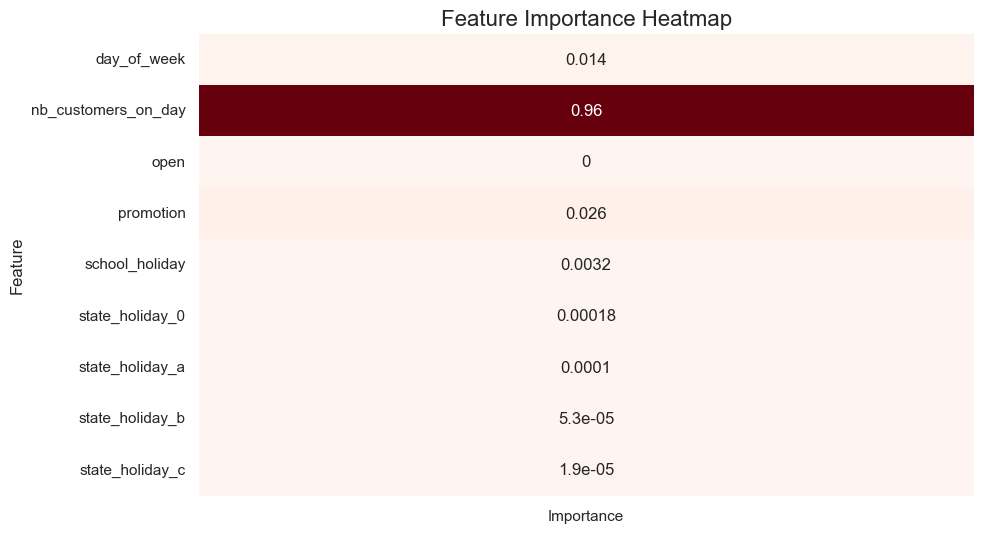

In [108]:
# feature importance using seaborn heatmap
plt.figure(figsize=(10, 6))
heatmap_data = feature_importance_df.pivot_table(index='Feature', values='Importance')
sns.heatmap(heatmap_data, cmap="Reds", annot=True, cbar=False)
plt.title("Feature Importance Heatmap", fontsize=16)
plt.show()

# Model Evaluation & Visual Exploration

In [109]:
y_val_pred = model.predict(X_val)

In [110]:
r2 = r2_score(y_val, y_val_pred)
print(f"The R2 Score on Validation Set:", r2)

The R2 Score on Validation Set: 0.8600237595668748


**Histogram for better visualization for the predicted values**

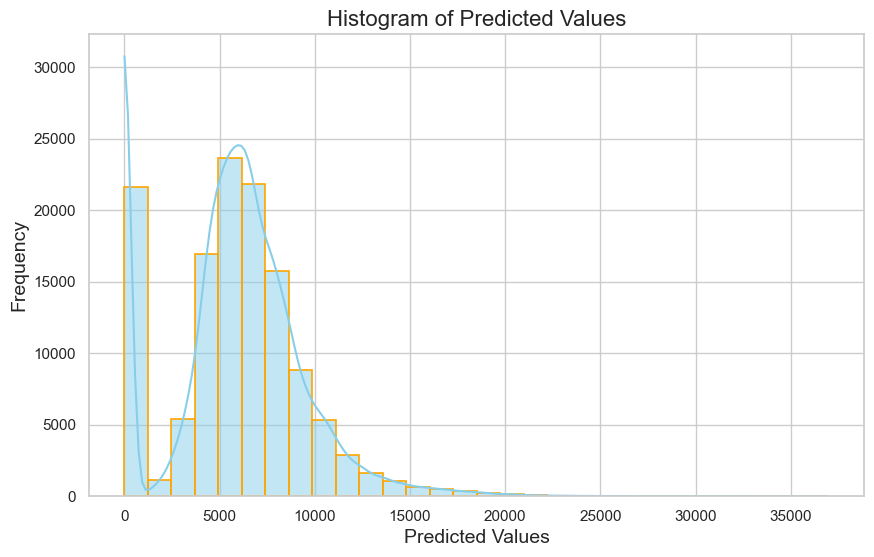

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(y_val_pred, bins=30, kde=True, color='skyblue', edgecolor='orange', linewidth=1.2)
plt.title('Histogram of Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [112]:
#the style for seaborn
sns.set(style="whitegrid")

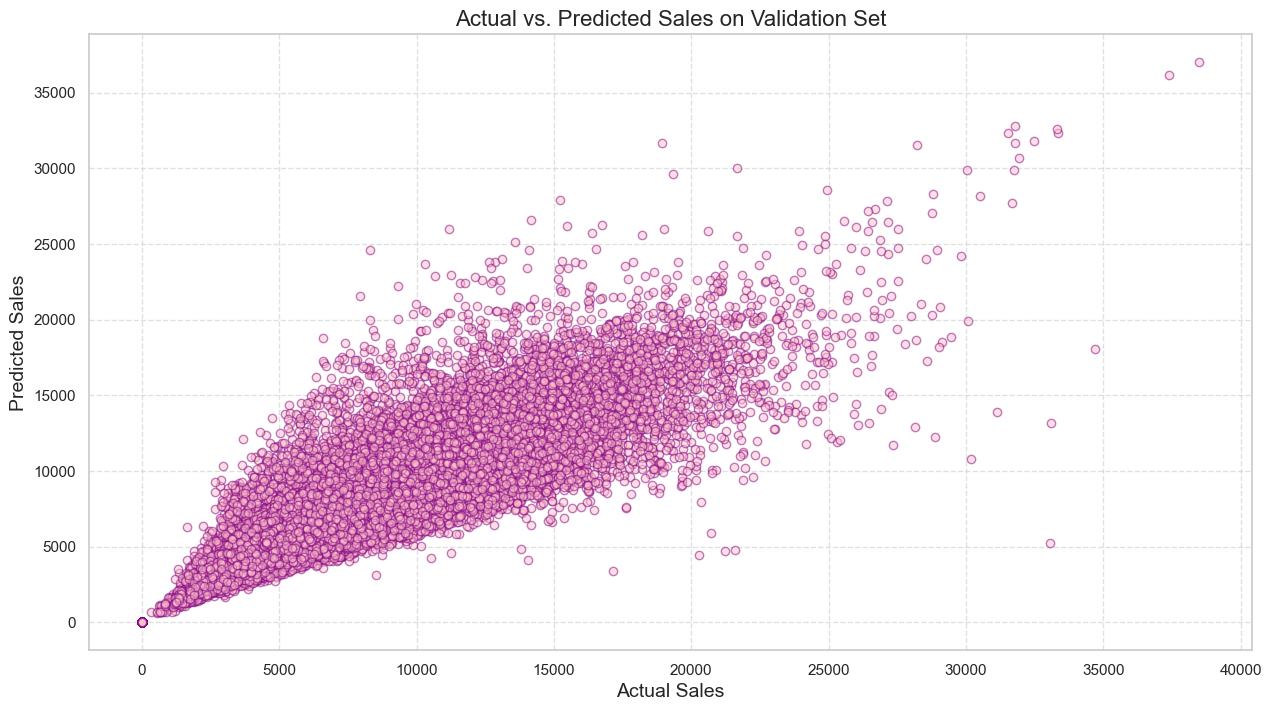

In [113]:
# Scatter plot: Actual vs. Predicted values
plt.figure(figsize=(15, 8))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='pink', edgecolors='purple')
plt.title("Actual vs. Predicted Sales on Validation Set", fontsize=16)
plt.xlabel("Actual Sales", fontsize=14)
plt.ylabel("Predicted Sales", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


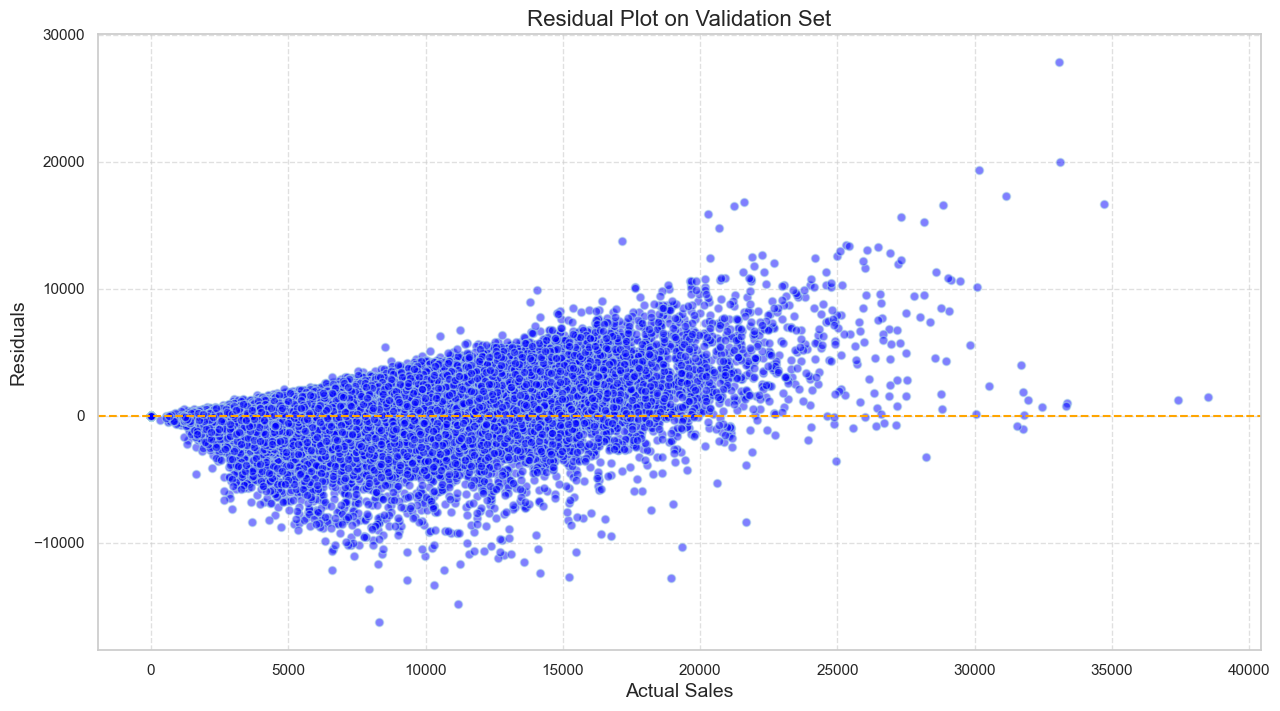

In [114]:
# Residual plot
residuals = y_val - y_val_pred
plt.figure(figsize=(15, 8))
plt.scatter(y_val, residuals, alpha=0.5, color='blue', edgecolors='lightblue')
plt.title("Residual Plot on Validation Set", fontsize=16)
plt.xlabel("Actual Sales", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.axhline(y=0, color='orange', linestyle='--')  # Horizontal line at y=0
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Model Serialization- Saving Trained Model so that it can be used later without having to retrain.

In [115]:
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [116]:
#just trying to access and load my trained model
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [117]:
loaded_model

RandomForestRegressor(random_state=0)

In [118]:
feature_engineering_steps = {
    'date_conversion': True, 
    'one_hot_encoding': True,  
}

with open('feature_engineering_steps.pkl', 'wb') as file:
    pickle.dump(feature_engineering_steps, file)

In [119]:
#When i want to access and use these feature engeering steps 
with open('feature_engineering_steps.pkl', 'rb') as file:
    loaded_feature_engineering_steps = pickle.load(file)

In [120]:
loaded_feature_engineering_steps

{'date_conversion': True, 'one_hot_encoding': True}

# Making Predictions-Before Submitting

In [121]:
X_submission = sales_data[features]

In [122]:
predictions_submission = loaded_model.predict(X_submission)

# Creating Output File:

In [123]:
output_sales_data = pd.DataFrame({'index': X_submission.index, 'sales_prediction': predictions_submission})
output_sales_data.to_csv('submission_output.csv', index=False)

# Save Predictions

In [124]:
with open('predictions_submission.pkl', 'wb') as file:
    pickle.dump(predictions_submission, file)

# Save Model and Artifacts

In [125]:
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(loaded_model, file)

with open('feature_engineering_steps.pkl', 'wb') as file:
    pickle.dump(loaded_feature_engineering_steps, file)

with open('requirements.txt', 'w') as file:
    file.write("scikit-learn==1.3.0\n numpy== 1.24.3\n pandas== 2.0.3") 

In [130]:
#need to check my versions so i use it in my requirement file
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("scikit-learn version:", sklearn_version)

pandas version: 2.0.3
numpy version: 1.24.3
scikit-learn version: 1.3.0


In [129]:
%pip show matplotlib
%pip show seaborn

Name: matplotlib
Version: 3.7.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/susanndinoshinge/opt/anaconda3/lib/python3.9/site-packages
Requires: contourpy, cycler, fonttools, importlib-resources, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: glue-core, glue-vispy-viewers, mpl-scatter-density, seaborn, wordcloud
Note: you may need to restart the kernel to use updated packages.
Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Users/susanndinoshinge/opt/anaconda3/lib/python3.9/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.
